In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
wis = pd.read_csv('data.csv')

ins = pd.read_csv('insurance.csv')

## Breast Cancer Diagnosis Clustering

In [4]:
wis.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [6]:
wis.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
wis = wis.drop('Unnamed: 32', axis=1)

In [9]:
columns_to_drop = ['id','radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 
                   'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                   'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
                   'concavity_se','concave points_se','symmetry_se','fractal_dimension_se']


for column in columns_to_drop:
    wis.drop(column,axis=1,inplace=True)

wis.columns

Index(['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [11]:
X = wis

# Encoding categorical features and scaling

categorical_cols = list(set(X.columns) - set(X._get_numeric_data().columns))
X = pd.get_dummies(X, columns=categorical_cols,drop_first=True)


from sklearn.preprocessing import StandardScaler

sca = StandardScaler().set_output(transform='pandas')

X = sca.fit_transform(X)


In [15]:
X

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676
1,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676
2,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676
3,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676
4,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676
...,...,...,...,...,...,...,...,...,...,...,...
564,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1.297676
565,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1.297676
566,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1.297676
567,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1.297676


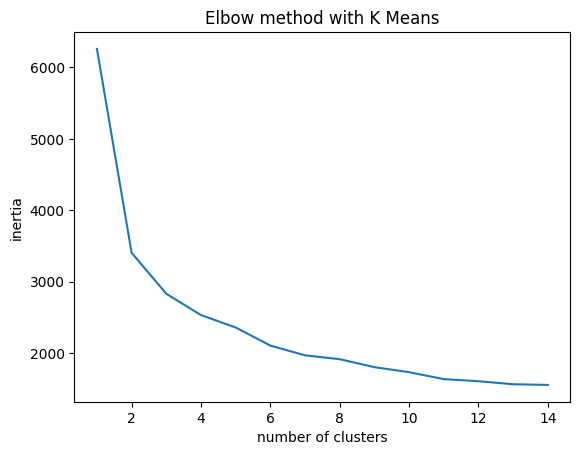

In [16]:
from sklearn.cluster import KMeans

k_range = range(1,15)

inertias = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=15)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(k_range, inertias)
plt.title('Elbow method with K Means')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

plt.show()

### Seems like 2-4 clusters will be the best solution based on the elbow method and K Means. Since we know the dataset represents patients with either a positive or negative diagnosis, 2 clusters seems like it may be the most useful.

In [18]:
from sklearn.cluster import KMeans

model_KM = KMeans(n_clusters=2)
model_KM.fit(X)

from sklearn.metrics import silhouette_score

silhouette_score(X,model_KM.labels_)

np.float64(0.43629507404947365)

In [76]:
from sklearn.cluster import AgglomerativeClustering

model_agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
model_agg.fit(X)

from sklearn.metrics import silhouette_score

silhouette_score(X,model_agg.labels_)

np.float64(0.24690190995133385)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -(np.inf)
best_eps = None

for eps in range(40000):
    #print("Eps: ",0.01+(eps*0.001))
    model_DB = DBSCAN(0.01+(eps*0.0001))
    model_DB.fit(X)
    try:
        score = silhouette_score(X,model_DB.labels_, random_state=0)
        if (score > best_score) and (len(set(model_DB.labels_))>2):
            best_score = score
            best_eps = 0.01+(eps*0.0001)
    except:
        pass

print("Best eps: ",best_eps)
print("Best Sil Score: ",best_score)

model_DB = DBSCAN(eps=best_eps)
model_DB.fit(X)

print(model_DB.labels_)
#print(silhouette_score(X,model_DB.labels_,random_state=0))
#print(len(set(model_DB.labels_))-1)

Best eps:  2.0793999999999997
Best Sil Score:  0.39671585590973113
[-1  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  1  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0 -1  0  0  0  1  0
  1  1  1  1  1  0  0  1  0  0  1  1  1  1  0  1  0  0  1  1 -1  1  0  1
  0  0  1  0  1  0 -1  1  1  1 -1  0  1  0  0  0  1  1  1  0  1  1  0  0
  1  1  1  0  0  1  1  1  1  0  1  1 -1  1  1  1  1  1  1  1  1  0  0 -1
  1  0  0  1  1  1  0  0  1  0  1  0  0  1  0  0  1  1  0  1  1  0  1  1
  1  1 -1  1  1  1  1 -1  1  1  1  1  0  1  1  1  1  0  0  1  0  1  1  0
  0  1  1  0  0  1  1  1  1  0  1  1  0 -1  0  1  0  1  0  1  1  1 -1  1
  1  0  0  1  0  0  0  0  1  0  0 -1  1  0  1  0  1  1  0  1 -1  0  0  0
  1  1  0  0  1  1  1  0  1  1  1  1  1  0  0  1  1  0  1  1  0  0  1  0
  1  1 -1  1  0  1  1 -1  1  1  0  1 -1  0  0  0  0  0  0 -1  0  0  0  0
  0 -1  1  1  1  1  1  1  0  1  0  1  1  0  1  1  0  1  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  0  1  0  1  1  1  1

In [61]:
models_bc = {}

models_bc['K_Means'] = model_KM
models_bc['Agglo'] = model_agg
models_bc['DBSCAN'] = model_DB

## Insurance Clustering

In [62]:
ins.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [63]:
X = ins

# Encoding categorical features and scaling

categorical_cols = list(set(X.columns) - set(X._get_numeric_data().columns))
X = pd.get_dummies(X, columns=categorical_cols,drop_first=True)


from sklearn.preprocessing import StandardScaler

sca = StandardScaler().set_output(transform='pandas')

X = sca.fit_transform(X)

In [70]:
X

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.989591,-0.507463,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.010519,-0.507463,-0.566418,-0.611324,1.765481


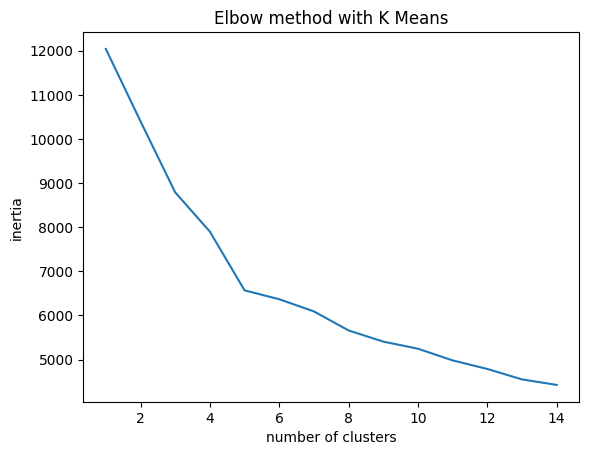

In [75]:
from sklearn.cluster import KMeans

k_range = range(1,15)

inertias = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(k_range, inertias)
plt.title('Elbow method with K Means')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

plt.show()

#### By using the elbow method on the insurance dataset above, it appears that 5 might be a good number of clusters.

In [67]:
from sklearn.cluster import KMeans

model2_KM = KMeans(n_clusters=5)
model2_KM.fit(X)

from sklearn.metrics import silhouette_score

silhouette_score(X,model2_KM.labels_)

np.float64(0.19751561050226554)

In [69]:
from sklearn.cluster import AgglomerativeClustering

model2_agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
model2_agg.fit(X)

from sklearn.metrics import silhouette_score

silhouette_score(X,model2_agg.labels_)

np.float64(0.2045672451280561)

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -(np.inf)
best_eps = None

for eps in range(40000):
    #print("Eps: ",0.01+(eps*0.001))
    model2_DB = DBSCAN(0.01+(eps*0.0001))
    model2_DB.fit(X)
    try:
        score = silhouette_score(X,model2_DB.labels_, random_state=0)
        if (score > best_score) and (len(set(model2_DB.labels_))>2):
            best_score = score
            best_eps = 0.01+(eps*0.0001)
    except:
        pass

print("Best eps: ",best_eps)
print("Best Sil Score: ",best_score)

model2_DB = DBSCAN(eps=best_eps)
model2_DB.fit(X)

print(model2_DB.labels_)
#print(silhouette_score(X,model2_DB.labels_,random_state=0))
#print(len(set(model2_DB.labels_))-1)

Best eps:  1.9951
Best Sil Score:  0.25207494186655405
[ 0  1  1 ...  3 11 15]


In [79]:
models_ins = {}

models_ins['K_Means'] = model2_KM
models_ins['Agglo'] = model2_agg
models_ins['DBSCAN'] = model2_DB

In [87]:

for model in models_ins:
    print(model)
    print('N Clusters: ',len(set(models_ins[model].labels_)))


K_Means
N Clusters:  5
Agglo
N Clusters:  5
DBSCAN
N Clusters:  17
